In [1]:
import os

In [2]:
os.chdir("C:\\Users\\KOMAL\\Desktop\\Projects FOr Resume")

In [3]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import preprocessing
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import metrics

In [4]:
#load dataset
data = pd.read_csv("Loan_Data.csv")

In [5]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
#checking missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

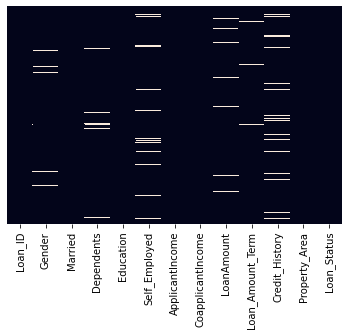

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
plt.show()

In [11]:
data['Gender'].value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

There are 489 male, 112 female and 13 missing values

Now we are going to fill all the null values in gender column with “No Gender”

In [12]:
data['Gender'].fillna('not disclosed', inplace = True)

In [13]:
data['Gender'].isnull().sum()

0

In [14]:
data['Dependents'].fillna('0',inplace=True)

In [15]:
data['Self_Employed'].value_counts(dropna = False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

There are 500 No, 82 Yes and 32 missing values

Now we are going to fill all the null values in Self_Employed column with “Not disclosed”

In [16]:
data['Self_Employed'].fillna('not disclosed', inplace = True)

In [17]:
#Finding the mean of the column having NaN
mean_value=data['LoanAmount'].mean()

In [18]:
mean_value

146.41216216216216

In [19]:
data['LoanAmount'].fillna(value=mean_value, inplace=True)

In [20]:
data['Married'].fillna('not disclosed', inplace= True)

In [21]:
data['Loan_Amount_Term'].fillna(method= 'ffill',inplace= True)
data['Credit_History'].fillna(method= 'ffill',inplace= True)

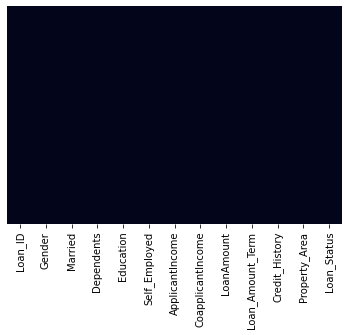

In [22]:
#using heatmap to figure out missing data if any
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
plt.show()

Now, we don't have any missing values in datasets

In [23]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
#checking the structure

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,3,3,4,2,3,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002006,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,360,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,341.628664,0.835505,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.037468,65.656819,0.371027,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,129.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


## Label Encoding for Target Variable

In [26]:
c_y = {"Loan_Status": {"Y": 1, "N": 0}}
data.replace(c_y, inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


## Spliting Target Variable

In [27]:
predictor= data.iloc[:, data.columns != 'Loan_Status']
target= data.iloc[:, data.columns == 'Loan_Status']

In [28]:
predictor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


In [32]:
#Creating the dummy variables and dropping the old column

predictor=predictor.drop(['Loan_ID'], axis=1)

## Dummy coding for Categorical Variables

In [33]:
# save all categorical columns in list

# dataframe with categorical features
data_cat=predictor.select_dtypes('object');data_cat

# dataframe with numerical features
data_num=predictor.select_dtypes(np.number)

In [34]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True);data_cat_dummies

,Gender_Male,Gender_not disclosed,Married_Yes,Married_not disclosed,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Self_Employed_not disclosed,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,0,0,0
610,1,0,1,0,0,0,1,0,0,0,0,0
611,1,0,1,0,1,0,0,0,0,0,0,1
612,1,0,1,0,0,1,0,0,0,0,0,1


In [35]:
# using concat function we merging two dataframe for furthere analysis
predictor = pd.concat([data_num, data_cat_dummies], axis=1)

In [36]:
predictor.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_not disclosed,Married_Yes,Married_not disclosed,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Self_Employed_not disclosed,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,0,1,0,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,0,0,0,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,0,0,0,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1


In [37]:
#Let us now split the dataset into train & test

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor,target, test_size = 0.30, random_state=0)

print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (429, 17)
x_test  (185, 17)
y_train  (429, 1)
y_test  (185, 1)


In [38]:
# Create decision tree classifier object using gini index
CLF_DT = DecisionTreeClassifier(criterion='gini', random_state=0)

In [39]:
# Train model
model_DT = CLF_DT.fit(x_train,y_train)

In [40]:
# Predicting the model
y_pred_DT = model_DT.predict(x_test);y_pred_DT

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

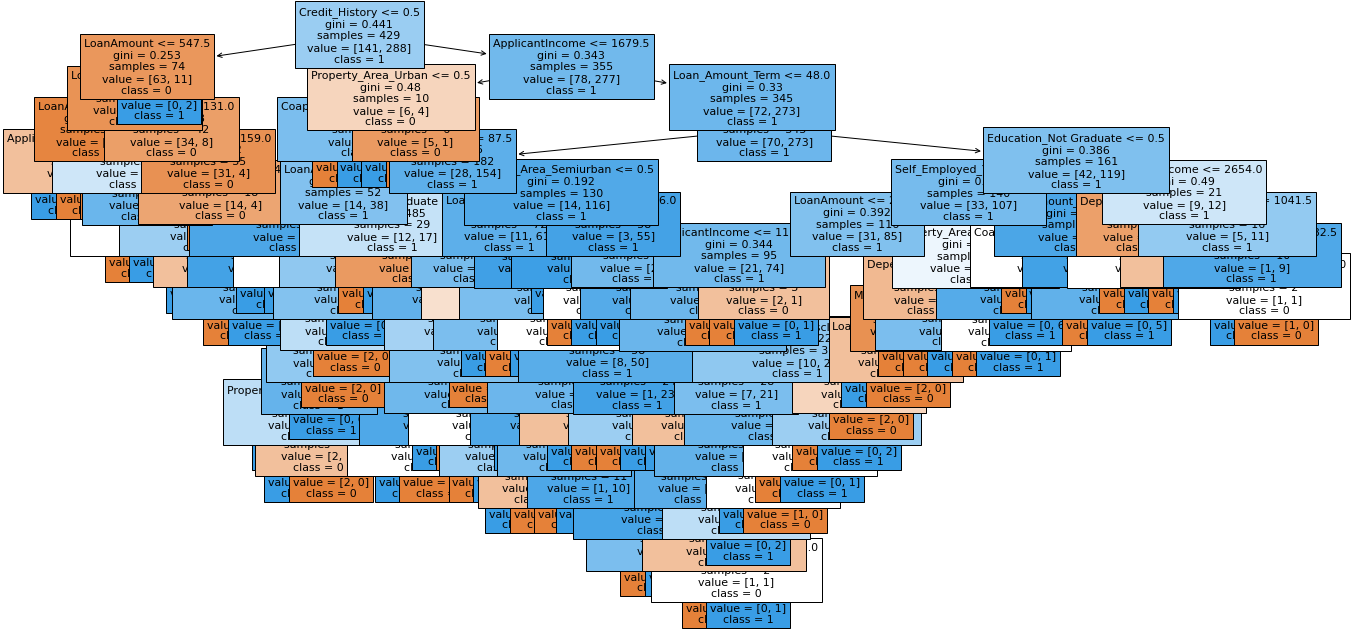

In [42]:
plt.figure(figsize=(22, 11))
plot_tree(model_DT,fontsize=11,feature_names=x_train.columns,filled=True,class_names=["0","1"]);plt.show()

In [43]:
#checking the performance of the model
from sklearn.metrics import classification_report

In [44]:
print (classification_report (y_test,y_pred_DT)) # why is precision,recall,F -1 score so low for  cat 0 and high for cat 1

              precision    recall  f1-score   support

           0       0.51      0.61      0.55        51
           1       0.84      0.78      0.81       134

    accuracy                           0.73       185
   macro avg       0.67      0.69      0.68       185
weighted avg       0.75      0.73      0.74       185



## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Create random tree classifer object

clf_RF = RandomForestClassifier(random_state=0,n_estimators=500,criterion='entropy',bootstrap=False)

#changing n_estimators from 100 to 500 has no impact on the precision/recall

In [46]:
# Train model
model_RF = clf_RF.fit(x_train,y_train)

# Predicting the model
y_pred_RF = model_RF.predict(x_test);y_pred_RF

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred_RF)) #no improvement over DT 

              precision    recall  f1-score   support

           0       0.70      0.51      0.59        51
           1       0.83      0.92      0.87       134

    accuracy                           0.81       185
   macro avg       0.77      0.71      0.73       185
weighted avg       0.80      0.81      0.79       185



In [48]:
# Create decision tree classifier object using gini index
clf_DT_arg = DecisionTreeClassifier(criterion='gini', random_state=0,min_samples_leaf=700,max_features=10,max_depth=5)

In [49]:
# Train model
model_DT_arg = clf_DT_arg.fit(x_train,y_train)

In [50]:
# Predicting the model
y_pred_model_DT_arg = model_DT_arg.predict(x_test);y_pred_DT

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

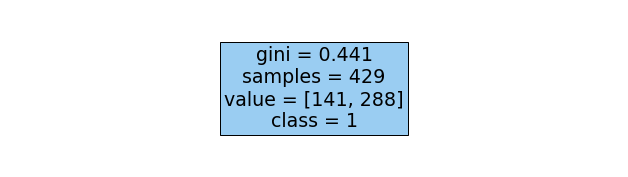

In [55]:
plt.figure(figsize=(11,3))
plot_tree(model_DT_arg,fontsize=19,feature_names=x_train.columns,filled=True,class_names=["0","1"]);plt.show()

In [56]:
1-((25579/(25579+3252))**2+(3252/(25579+3252))**2)

0.20014497106523543

In [57]:
print(classification_report(y_test,y_pred_model_DT_arg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.72      1.00      0.84       134

    accuracy                           0.72       185
   macro avg       0.36      0.50      0.42       185
weighted avg       0.52      0.72      0.61       185



In [58]:
#lets check if there is any class imbalance problem

y_train.value_counts()/len(y_train) #severe class imbalance issue 

Loan_Status
1              0.671329
0              0.328671
dtype: float64

In [59]:
!pip install imblearn

In [60]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')

predictor_sm,target_sm=smote.fit_resample(predictor,target)

target_sm.value_counts()

Loan_Status
0              422
1              422
dtype: int64

In [61]:
predictor_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ApplicantIncome              844 non-null    int64  
 1   CoapplicantIncome            844 non-null    float64
 2   LoanAmount                   844 non-null    float64
 3   Loan_Amount_Term             844 non-null    float64
 4   Credit_History               844 non-null    float64
 5   Gender_Male                  844 non-null    uint8  
 6   Gender_not disclosed         844 non-null    uint8  
 7   Married_Yes                  844 non-null    uint8  
 8   Married_not disclosed        844 non-null    uint8  
 9   Dependents_1                 844 non-null    uint8  
 10  Dependents_2                 844 non-null    uint8  
 11  Dependents_3+                844 non-null    uint8  
 12  Education_Not Graduate       844 non-null    uint8  
 13  Self_Employed_Yes   

## Spliting Dataset into Train & Test

In [62]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor_sm,target_sm, test_size = 0.30, random_state=0)

print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (590, 17)
x_test  (254, 17)
y_train  (590, 1)
y_test  (254, 1)


## Decision Tree Classifier

In [63]:
# Create decision tree classifier object using gini index/entropy
clf_DT_smot = DecisionTreeClassifier(criterion='entropy', random_state=0,min_samples_split=700,max_depth=6)

In [64]:
# Train model
model_DT_smot = clf_DT_smot.fit(x_train,y_train)

# Predicting the model
y_pred_DT_smot = model_DT_smot.predict(x_test);y_pred_DT

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

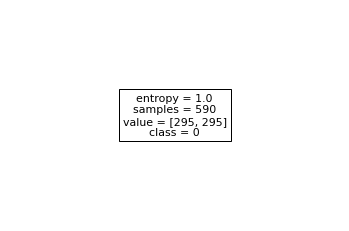

In [70]:
plt.figure(figsize=(6, 4))
plot_tree(model_DT_smot,fontsize=11,feature_names=predictor_sm.columns,filled=True,class_names=["0","1"]);plt.show()

In [71]:
print(classification_report(y_test,y_pred_DT_smot))# check if the precison recall and the F 1 score has improved

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       127
           1       0.00      0.00      0.00       127

    accuracy                           0.50       254
   macro avg       0.25      0.50      0.33       254
weighted avg       0.25      0.50      0.33       254



## Grid search for Decision trees

In [73]:
#Grid search for decision trees

from sklearn.model_selection import GridSearchCV

tuned_paramaters=[{'criterion':['gini','entropy'],'max_depth':range(2,10)}]
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,tuned_paramaters,cv=10,scoring='roc_auc')

clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [74]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [75]:
clf.best_score_

0.8540804597701148

## Final Model after Grid Search

In [76]:
# Create decision tree classifier object using gini index
Final_DT_model = DecisionTreeClassifier(criterion='entropy', random_state=0,min_samples_split=700,max_depth=9)

Final_DT_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=700,
                       random_state=0)

In [77]:
# Predicting the model
y_pred_Final_DT_model = Final_DT_model.predict(x_test);y_pred_DT

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [78]:
print(classification_report(y_test,y_pred_Final_DT_model))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       127
           1       0.00      0.00      0.00       127

    accuracy                           0.50       254
   macro avg       0.25      0.50      0.33       254
weighted avg       0.25      0.50      0.33       254



## Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
# Create random tree classifer object
clf_RF_smote = RandomForestClassifier(random_state=0,bootstrap=False)

In [80]:
y_train.value_counts()

Loan_Status
0              295
1              295
dtype: int64

In [81]:
# Train model
model_RF_smote = clf_RF_smote.fit(x_train,y_train)

# Predicting the model
y_pred_RF_smote = model_RF_smote.predict(x_test);y_pred_RF

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred_RF_smote))# check if the precison recall and the F 1 score has improved

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       127
           1       0.78      0.88      0.83       127

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.81       254
weighted avg       0.82      0.81      0.81       254



## Feature Importance

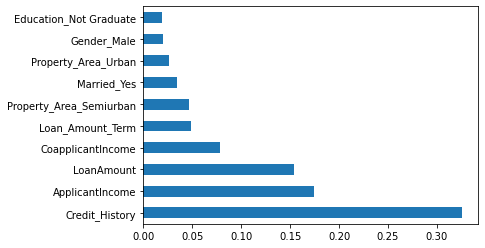

In [83]:
(pd.Series(model_RF_smote.feature_importances_, index=predictor.columns).nlargest(10).plot(kind='barh'));plt.show()

## Bagging Classifier

In [85]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(model_RF_smote, random_state=1)
bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                        random_state=0),
                  random_state=1)

In [86]:
bagging.predict(x_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [87]:
bagging.n_estimators


10

In [88]:
bagg_pred=bagging.predict(x_test)

In [89]:
print(classification_report(y_test,bagg_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79       127
           1       0.76      0.91      0.82       127

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.81       254
weighted avg       0.82      0.81      0.81       254



## Adaboost Classifier

In [91]:
# Create adaboost-decision tree classifer object
clf_ABC1 = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)

In [92]:
?clf_ABC1

In [93]:
# Train model
clf_ABC1 = clf_ABC1.fit(x_train,y_train)

# Predicting the model
y_pred_ABC1 = clf_ABC1.predict(x_test)

In [94]:
y_pred_ABC1

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [95]:
print(classification_report(y_test,y_pred_ABC1))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       127
           1       0.76      0.83      0.79       127

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.79      0.78      0.78       254



## ROC Curve

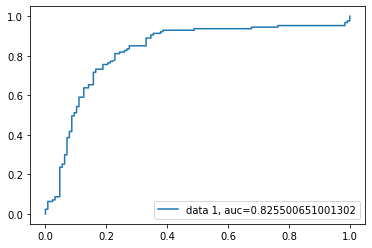

In [96]:
y_pred_proba = clf_ABC1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()